Past works:
1. Ho, P.J., Lau, H.S.H., Ho, W.K. et al. Incidence of breast cancer attributable to breast density, modifiable and non-modifiable breast cancer risk factors in Singapore. Sci Rep 10, 503 (2020). https://doi.org/10.1038/s41598-019-57341-7
2. Yue, W., Wang, Z., Chen, H., Payne, A., & Liu, X. (2018, May 9). Machine learning with applications in breast cancer diagnosis and prognosis. MDPI. https://www.mdpi.com/2411-9660/2/2/13
3. S. Sharma, A. Aggarwal and T. Choudhury, "Breast Cancer Detection Using Machine Learning Algorithms," 2018 International Conference on Computational Techniques, Electronics and Mechanical Systems (CTEMS), Belgaum, India, 2018, pp. 114-118, doi: 10.1109/CTEMS.2018.8769187.

The limitations of these works are that they depend largely on the accuracy of data labelling, and any noise in the data would affect the accuracy of machine learning models.

We would overcome the limitations by performing the bootstrap method to improve the accuracy of data labels. The bootstrap method can be found under the bootstrap_find_outliers.ipynb.

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Data/data.csv")

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Info and Statistics of the Dataset
- No missing values are found

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Count of Each Class
- 61.34% of the observations are Benign, while only 38.66% are Malignant
- Due to the imbalance of the dataset, a stratified sampling for train test split may be considred, depending on the outcome of usual `train_test_split()`
- In our prject, by setting the `random_state = 42`, both training set and testing set have similar percentages for each class

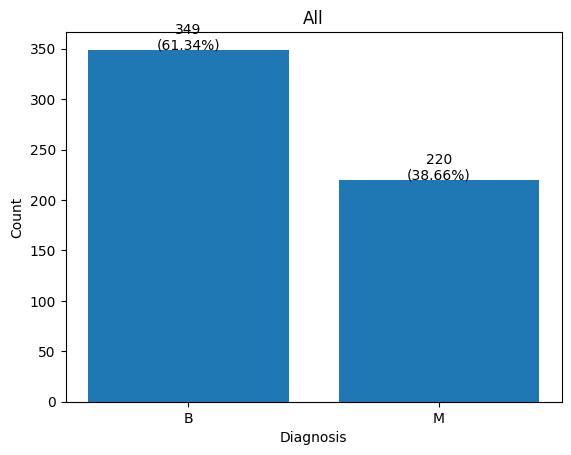

In [ ]:
dic = {"B": 0, "M": 0}
for ele in df.iloc[:, 0]:
   if ele == "B":
      dic["B"] += 1
   else:
      dic["M"] += 1

diagnosis, count = list(dic.keys()), list(dic.values())
plt.bar(diagnosis, count)
total = sum(count)
for i, c in enumerate(count):
    percentage = (c / total) * 100
    plt.text(i, c + 0.1, f"{c}\n({percentage:.2f}%)", ha='center')

plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("All")
plt.show()

## Correlation Tests between Variables
- Pearson correlation coefficient can be used as long as we convert the `diagnosis` column into 1 and 0, with 1 representing "Benign" and 0 representing "Malignant".
- We can observe that most of the independent variables have **moderate to strong negative correlation** between them and `diagnosis`
- In other words, as the values of these variables increase, the cancer diagnosis is likely to be **"Malignant"**
- It also indicates that these columns are useful predictors for cancer diagnosis

<Axes: >

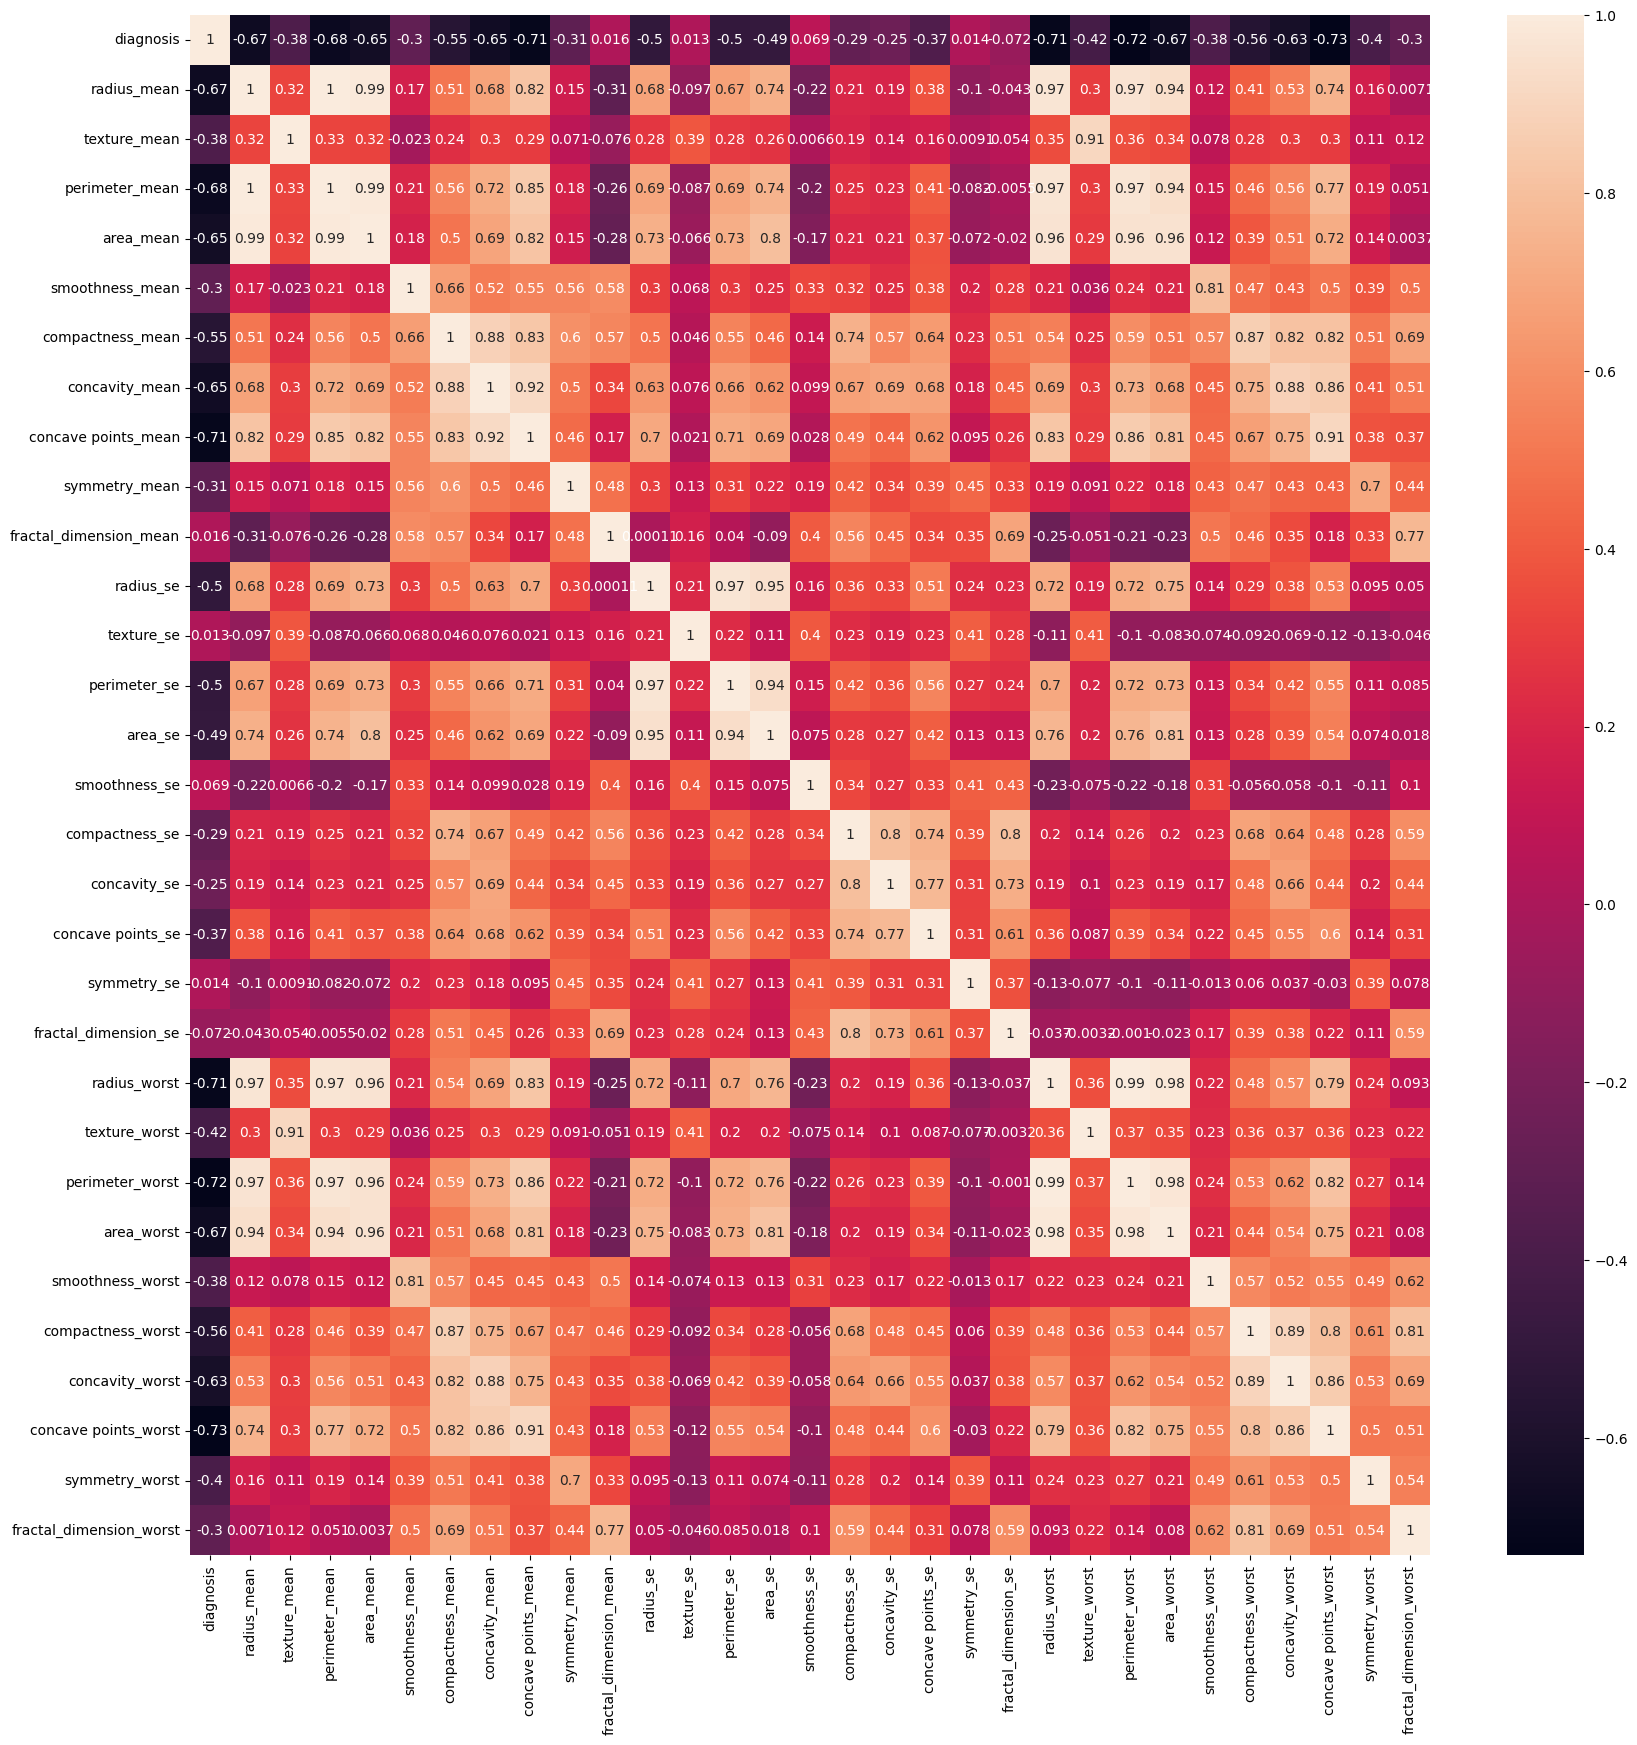

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: 1 if x == "B" else 0)

corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot = True)

## Outliers Detection
- There are some outliers in certain columns. Observing that they are not data-entry error, and considering that they are negatively associated with `diagnosis`, these outliers can be justified as important observations for being classified as "Malignant".
- Hence, we decide not to remove them

<Axes: >

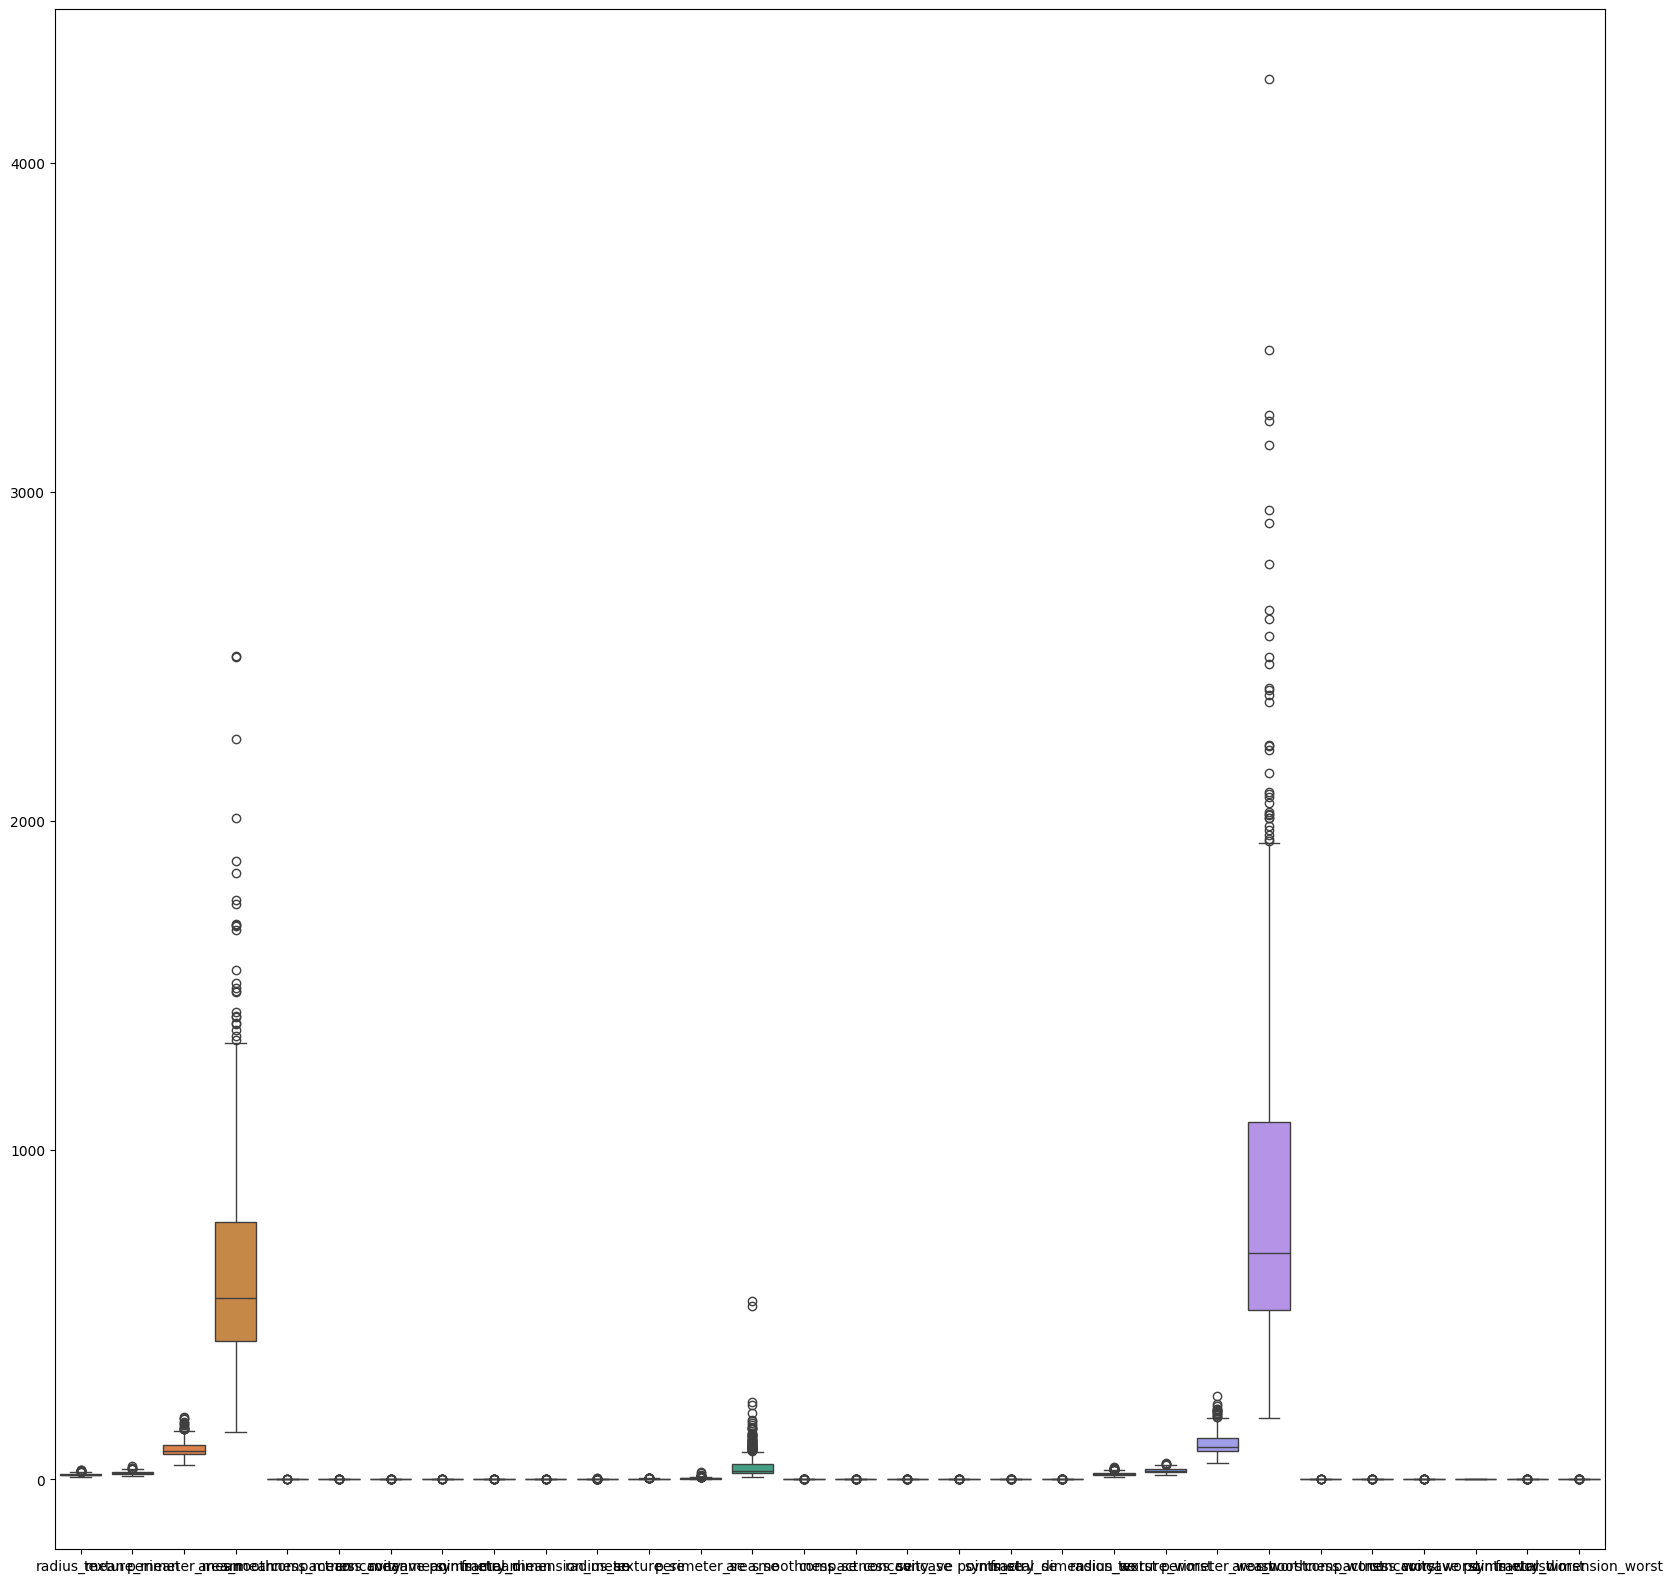

In [ ]:
plt.figure(figsize=(20, 20))
sns.boxplot(df.iloc[:, 1:])

<Axes: >

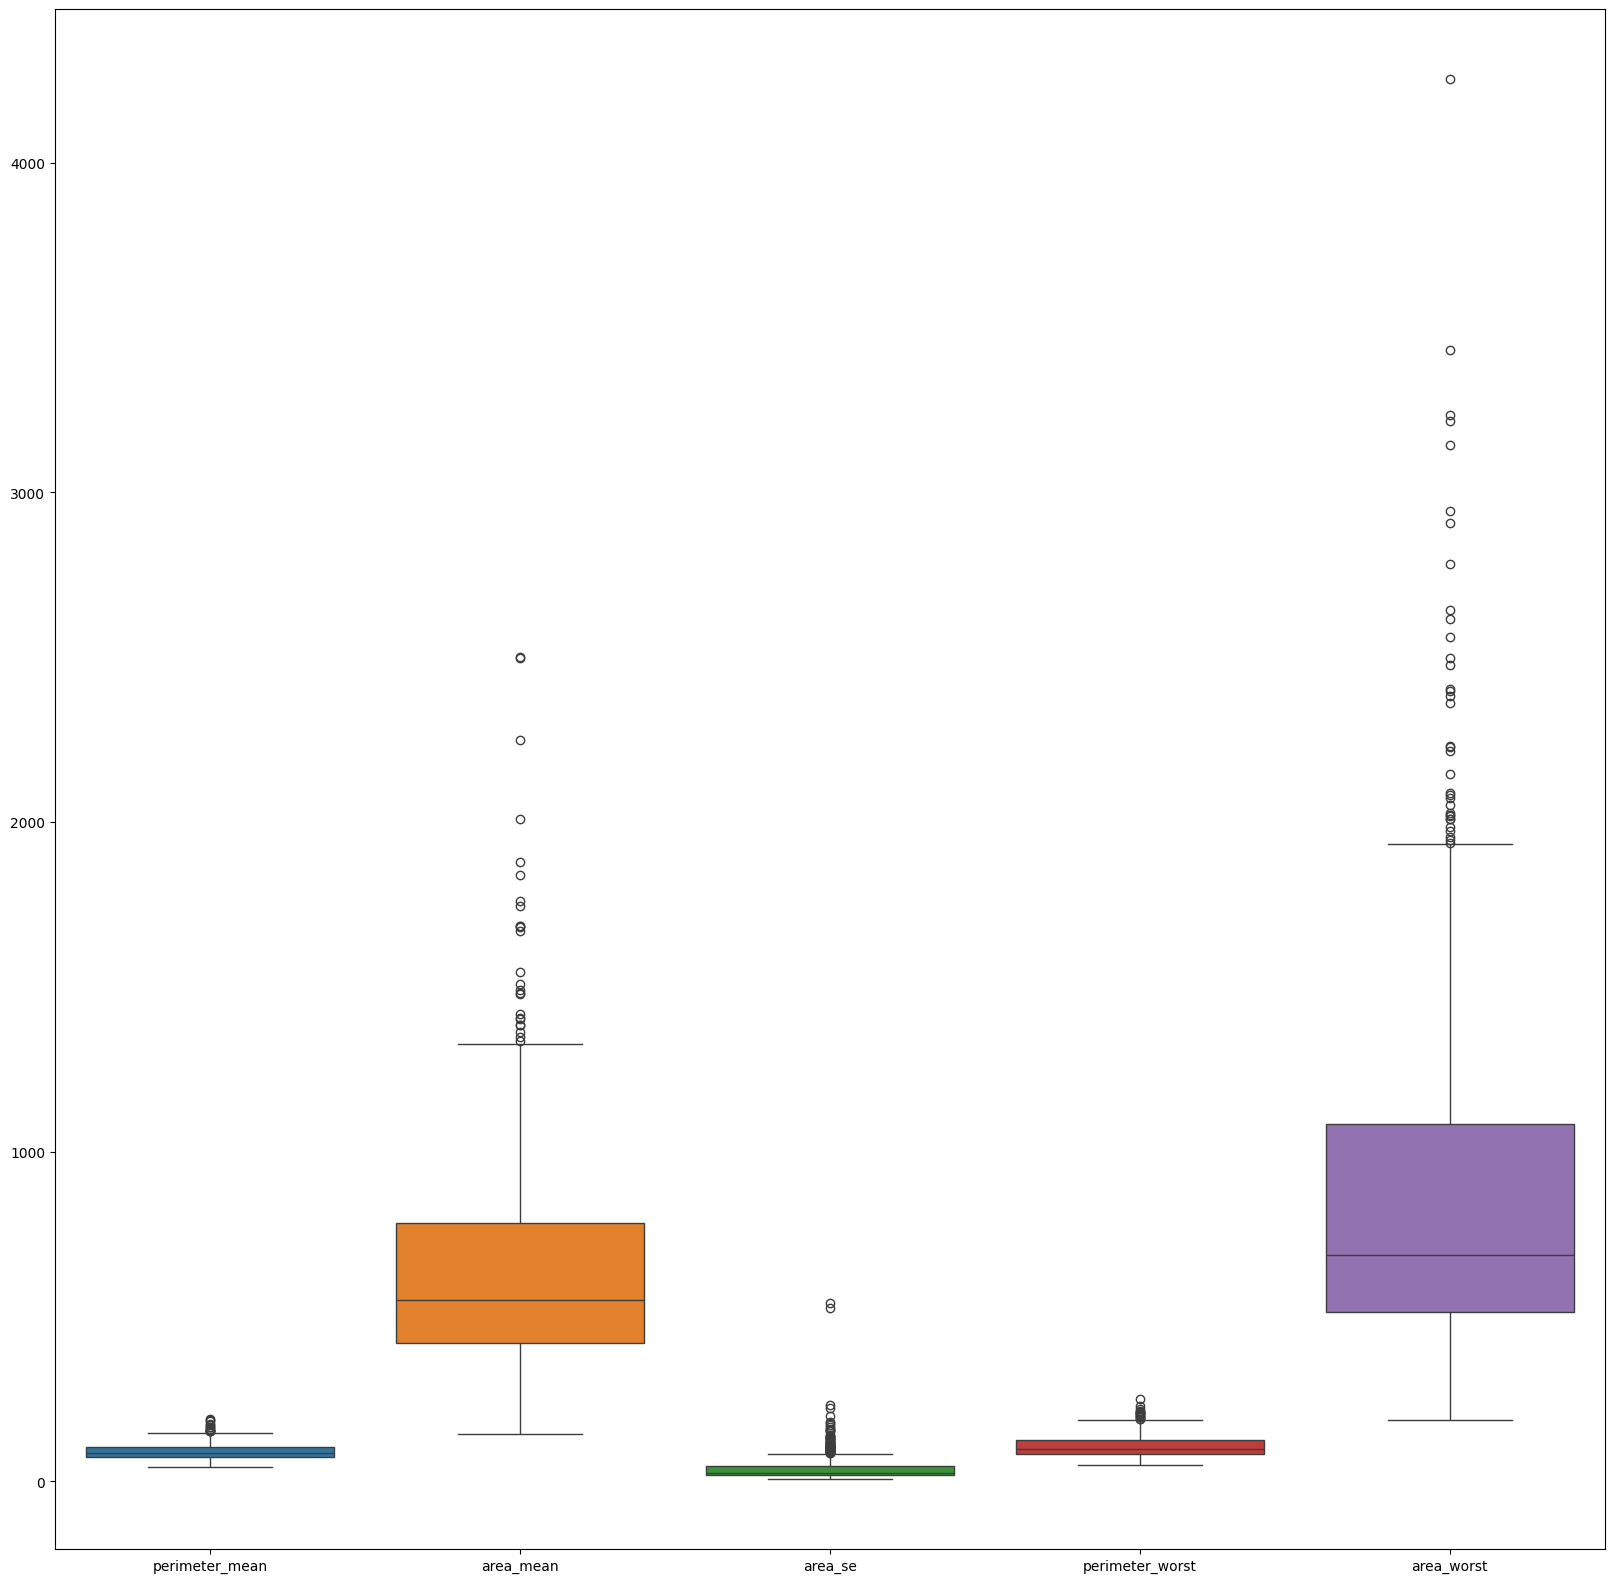

In [ ]:
df.columns[[3, 4, 14, 23, 24]]
plt.figure(figsize=(20, 20))
sns.boxplot(df.iloc[:, [3, 4, 14, 23, 24]])

In [ ]:
dic = {}

for col in df.columns[[3, 4, 14, 23, 24]]:
   x = df.loc[:, col]
   q1, q3 = np.percentile(x, 25), np.percentile(x, 75)
   mean, std, iqr = np.mean(x), np.std(x), q3 - q1
   threshold = q3 + 3 * iqr
   dic[col] = sorted(list(x[x > threshold]), reverse = True)

for col, lst in dic.items():
   print(f"{col}:", lst)


perimeter_mean: []
area_mean: [2501.0, 2499.0, 2250.0, 2010.0, 1878.0]
area_se: [542.2, 525.6, 233.0, 224.1, 199.7, 180.2, 176.5, 170.0, 164.1, 158.7, 156.8, 155.8, 153.4, 153.1, 139.9, 138.5, 137.9, 134.8, 133.0, 130.8, 130.2, 128.7]
perimeter_worst: [251.2]
area_worst: [4254.0, 3432.0, 3234.0, 3216.0, 3143.0, 2944.0, 2906.0]


## Normality Test
- Applying Shapiro-Wilk Test for normality, the test has such hypothesis

$$H_0: \text{The distribution is normal}$$
$$H_1: \text{The distribution is not normal}$$

- We will claim that the variable follows a normal distribution if the $H_0$ is not rejected (i.e. p-value > 0.05).
- However, the p-values for all columns are less than 0.05, that means all features are not normal.
- Depending on the assumptions of the ML algorithm, normality may affect the prediction outcome.
- In this project, none of our models reuqire the assumption of normality, hence we will just leave it as it is.


In [ ]:
from scipy.stats import shapiro

for col in df.columns:
   stat = shapiro(df.loc[:, col])
   if stat[1] > 0.05:
      print(col)